In [155]:
import numpy as np
import matplotlib.pyplot as plt

In [156]:
m = 20             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -512             # valor mínimo de x
b = 512             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 50  # número de generaciones
etapas = 5        # número de etapas  

In [157]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [158]:
pob = gen_pop(pob_size, t)
print("Población:")
print(pob)

Población:
[[0 0 1 ... 1 1 0]
 [1 0 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [0 0 1 ... 1 1 0]
 [0 0 1 ... 0 1 1]
 [0 1 0 ... 0 1 0]]


In [159]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [160]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


In [161]:
#def funcion(x):
    #return np.sum(x**2)
#def funcion(x,y):
     #return np.sum(x**2) # esfera
    #return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2) #rosenbrock
 #   return (x**2 + y - 11)**2 + (x + y**2 - 7)**2 #himmenblau

def funcion(x,y):
   term1 = np.sin(np.sqrt(np.abs(x/2 + y + 47)))
   term2 = np.sin(np.sqrt(np.abs(x - (y + 47))))
   return -(y + 47) * term1 - x * term2



In [162]:
def eva_funcion(ind, a, b, m, decimales):
    x,y= deco_ind(ind, a, b, m, decimales)
    return funcion(x,y)

In [163]:
def main():
    
    for idx, ind in enumerate(pob):
        decoded = deco_ind(ind, m, a, b, decimales)
        evaluation = eva_funcion(ind, m, a, b, decimales)
        print(f"\nIndividuo {idx+1}:")
        print("Genotipo:", ind)
        print("Fenotipo:", decoded)
        print("Evaluación f(x):", evaluation)

if __name__ == "__main__":
    main()



Individuo 1:
Genotipo: [0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1
 1 1 0]
Fenotipo: [-263.23   296.171]
Evaluación f(x): -442.96494177682973

Individuo 2:
Genotipo: [1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1
 1 0 0]
Fenotipo: [ 52.805 323.888]
Evaluación f(x): -282.71173897488944

Individuo 3:
Genotipo: [0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0
 1 1 0]
Fenotipo: [-97.716 231.444]
Evaluación f(x): -96.24761851095455

Individuo 4:
Genotipo: [1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0]
Fenotipo: [  82.54 -482.1 ]
Evaluación f(x): 421.98158626758783

Individuo 5:
Genotipo: [0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1
 1 0 1]
Fenotipo: [ -71.863 -315.159]
Evaluación f(x): -193.47025764476825

Individuo 6:
Genotipo: [0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0
 1 1 1]
Fenotipo: [-188.647   14.429]
E

In [164]:
def vasconcelos(pob, m, a, b, decimales, epsilon, s=1.5):
    aptituds = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
    N = len(pob)
    
    
    sorted_indices = np.argsort(aptituds)
    
   
    probas = np.zeros(N)
    for rank, idx in enumerate(sorted_indices):
        if N > 1:
            probas[idx] = (2 - s) / N + (2 * rank * (s - 1)) / (N * (N - 1))
        else:
            probas[idx] = 1
    probas = probas / np.sum(probas) 
    
    
    acc = np.cumsum(probas)
    r = np.random.rand()  
    selected_index = np.where(acc >= r)[0][0]
    return pob[selected_index], selected_index

In [165]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [166]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

In [167]:
def AG_etapas_vasconcelos(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
                     etapas, generaciones):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    total_generacion = 0
    h = []      # Historial de la mejor evaluación en cada generación
    h_pp = []  # Historial del promedio de evaluaciones en cada generación
    
    elite = int(np.ceil(0.2 * pob_size))
    
    for eta in range(etapas):
        print(f"\n=== Etapa {eta+1} ===")
        eta_h = []
        eta_h_pp = []
        for gen in range(generaciones):
            total_generacion += 1
            evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
            mejor_ahora = min(evaluar)
            current_avg = np.mean(evaluar)
            eta_h.append(mejor_ahora)
            eta_h_pp.append(current_avg)
            h.append(mejor_ahora)
            h_pp.append(current_avg)

            if mejor_ahora < mejor_aptitud:
                mejor_aptitud = mejor_ahora
                mejor_hijo = pob[evaluar.index(mejor_ahora)]

            if total_generacion % 10 == 0:
                print(f"Generación {total_generacion} - Mejor: {round(mejor_ahora, decimales)} | Promedio: {round(current_avg, decimales)}")

            #if round(mejor_ahora, decimales) <= target:
            #    print("Se ha alcanzado el objetivo")
            #   return mejor_hijo, mejor_ahora, total_generacion, h, h_pp 
            
            # elitismo
            sorted_indices = np.argsort(evaluar)
            elite_idx = [pob[i] for i in sorted_indices[:elite]]
            
            
            new_pob_elite = []
            while len(new_pob_elite) < (pob_size - elite):
                padre1, _ = vasconcelos(pob, m, a, b, decimales, epsilon)
                padre2, _ = vasconcelos(pob, m, a, b, decimales, epsilon)
                
                hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
                hijo1 = mutar(hijo1, proba_muta)
                hijo2 = mutar(hijo2, proba_muta)
                
                new_pob_elite.append(hijo1)
                if len(new_pob_elite) < (pob_size - elite):
                    new_pob_elite.append(hijo2)
            
            pob = np.array(new_pob_elite + elite_idx)
        print(f"Fin de la Etapa {eta+1}: Mejor en etapa: {round(min(eta_h), decimales)} | Promedio etapa: {round(np.mean(eta_h_pp), decimales)}")
    
    return mejor_hijo, mejor_aptitud, total_generacion, h, h_pp

Iteración 1

=== Etapa 1 ===
Generación 10 - Mejor: -926.859 | Promedio: -299.769
Generación 20 - Mejor: -932.445 | Promedio: -360.199
Generación 30 - Mejor: -933.049 | Promedio: -385.583
Generación 40 - Mejor: -933.188 | Promedio: -357.352
Generación 50 - Mejor: -935.301 | Promedio: -329.269
Fin de la Etapa 1: Mejor en etapa: -935.301 | Promedio etapa: -267.928

=== Etapa 2 ===
Generación 60 - Mejor: -935.301 | Promedio: -222.507
Generación 70 - Mejor: -935.316 | Promedio: -270.718
Generación 80 - Mejor: -935.318 | Promedio: -239.478
Generación 90 - Mejor: -935.337 | Promedio: -245.028
Generación 100 - Mejor: -935.337 | Promedio: -271.186
Fin de la Etapa 2: Mejor en etapa: -935.337 | Promedio etapa: -269.046

=== Etapa 3 ===
Generación 110 - Mejor: -935.338 | Promedio: -296.535
Generación 120 - Mejor: -935.338 | Promedio: -206.837
Generación 130 - Mejor: -935.338 | Promedio: -320.292
Generación 140 - Mejor: -935.338 | Promedio: -228.415
Generación 150 - Mejor: -935.338 | Promedio: -14

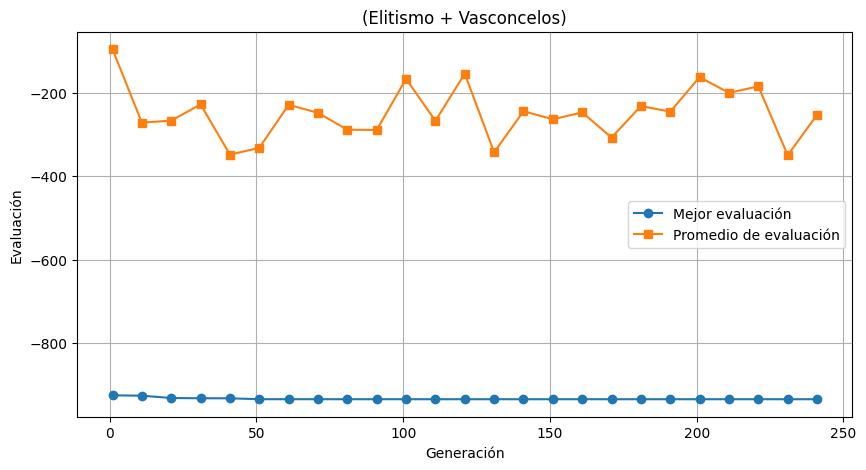

Iteración 2

=== Etapa 1 ===
Generación 10 - Mejor: -745.388 | Promedio: -206.348
Generación 20 - Mejor: -858.168 | Promedio: -309.565
Generación 30 - Mejor: -893.328 | Promedio: -237.033
Generación 40 - Mejor: -893.627 | Promedio: -255.934
Generación 50 - Mejor: -893.627 | Promedio: -222.587
Fin de la Etapa 1: Mejor en etapa: -893.627 | Promedio etapa: -191.633

=== Etapa 2 ===
Generación 60 - Mejor: -893.661 | Promedio: -330.666
Generación 70 - Mejor: -893.663 | Promedio: -205.9
Generación 80 - Mejor: -893.672 | Promedio: -329.411
Generación 90 - Mejor: -893.686 | Promedio: -143.206
Generación 100 - Mejor: -893.687 | Promedio: -155.007
Fin de la Etapa 2: Mejor en etapa: -893.687 | Promedio etapa: -228.743

=== Etapa 3 ===
Generación 110 - Mejor: -893.691 | Promedio: -237.767
Generación 120 - Mejor: -893.691 | Promedio: -210.199
Generación 130 - Mejor: -893.692 | Promedio: -206.714
Generación 140 - Mejor: -893.701 | Promedio: -407.867
Generación 150 - Mejor: -893.701 | Promedio: -277.

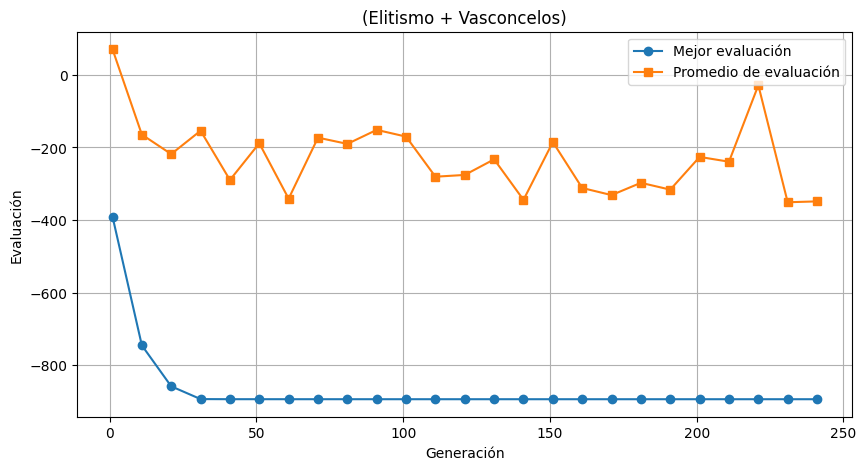

Iteración 3

=== Etapa 1 ===
Generación 10 - Mejor: -720.737 | Promedio: -125.217
Generación 20 - Mejor: -942.616 | Promedio: -72.931
Generación 30 - Mejor: -943.814 | Promedio: -207.269
Generación 40 - Mejor: -951.942 | Promedio: -224.755
Generación 50 - Mejor: -951.942 | Promedio: -96.141
Fin de la Etapa 1: Mejor en etapa: -951.942 | Promedio etapa: -163.483

=== Etapa 2 ===
Generación 60 - Mejor: -954.91 | Promedio: -167.87
Generación 70 - Mejor: -955.013 | Promedio: -235.045
Generación 80 - Mejor: -955.14 | Promedio: -317.743
Generación 90 - Mejor: -955.238 | Promedio: -52.507
Generación 100 - Mejor: -955.238 | Promedio: -183.187
Fin de la Etapa 2: Mejor en etapa: -955.238 | Promedio etapa: -217.659

=== Etapa 3 ===
Generación 110 - Mejor: -955.251 | Promedio: -219.215
Generación 120 - Mejor: -955.253 | Promedio: -245.329
Generación 130 - Mejor: -955.253 | Promedio: -244.933
Generación 140 - Mejor: -955.253 | Promedio: -172.883
Generación 150 - Mejor: -955.253 | Promedio: -58.302
F

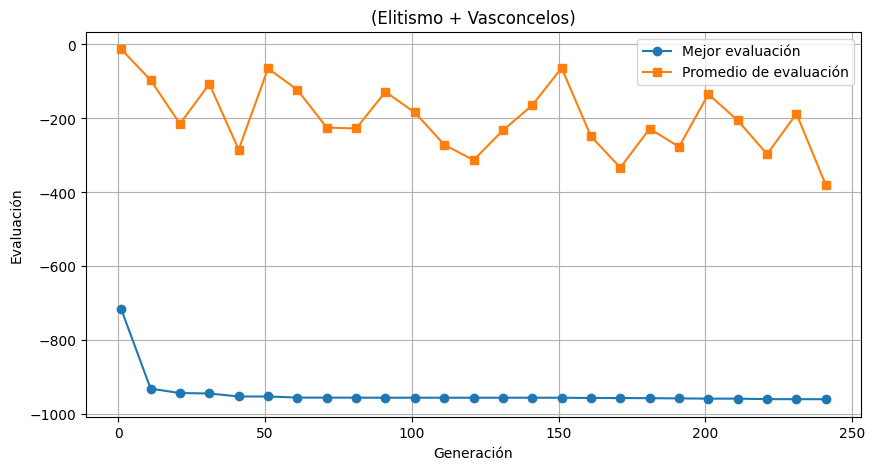

Iteración 4

=== Etapa 1 ===
Generación 10 - Mejor: -903.047 | Promedio: -228.207
Generación 20 - Mejor: -903.047 | Promedio: -177.453
Generación 30 - Mejor: -922.76 | Promedio: -90.391
Generación 40 - Mejor: -932.035 | Promedio: -220.334
Generación 50 - Mejor: -935.144 | Promedio: -354.625
Fin de la Etapa 1: Mejor en etapa: -935.144 | Promedio etapa: -212.782

=== Etapa 2 ===
Generación 60 - Mejor: -935.144 | Promedio: -205.579
Generación 70 - Mejor: -935.144 | Promedio: -147.65
Generación 80 - Mejor: -935.286 | Promedio: -193.556
Generación 90 - Mejor: -935.286 | Promedio: -236.096
Generación 100 - Mejor: -935.286 | Promedio: -249.132
Fin de la Etapa 2: Mejor en etapa: -935.286 | Promedio etapa: -230.61

=== Etapa 3 ===
Generación 110 - Mejor: -935.289 | Promedio: -290.628
Generación 120 - Mejor: -935.289 | Promedio: -243.647
Generación 130 - Mejor: -935.289 | Promedio: -337.141
Generación 140 - Mejor: -935.289 | Promedio: -227.184
Generación 150 - Mejor: -935.289 | Promedio: -194.57

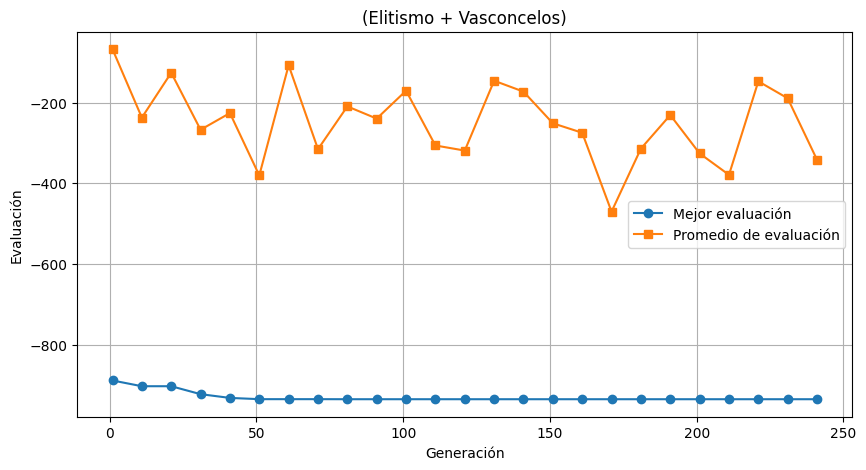

Iteración 5

=== Etapa 1 ===
Generación 10 - Mejor: -885.711 | Promedio: -191.148
Generación 20 - Mejor: -943.851 | Promedio: -252.316
Generación 30 - Mejor: -946.336 | Promedio: -255.149
Generación 40 - Mejor: -946.743 | Promedio: -171.535
Generación 50 - Mejor: -946.745 | Promedio: -50.512
Fin de la Etapa 1: Mejor en etapa: -946.745 | Promedio etapa: -211.3

=== Etapa 2 ===
Generación 60 - Mejor: -946.788 | Promedio: -217.444
Generación 70 - Mejor: -946.788 | Promedio: -301.346
Generación 80 - Mejor: -949.066 | Promedio: -363.538
Generación 90 - Mejor: -949.068 | Promedio: -125.647
Generación 100 - Mejor: -949.082 | Promedio: -110.031
Fin de la Etapa 2: Mejor en etapa: -949.082 | Promedio etapa: -243.842

=== Etapa 3 ===
Generación 110 - Mejor: -949.082 | Promedio: -62.501
Generación 120 - Mejor: -949.082 | Promedio: -287.141
Generación 130 - Mejor: -949.098 | Promedio: -350.606
Generación 140 - Mejor: -949.098 | Promedio: -210.934
Generación 150 - Mejor: -949.124 | Promedio: -338.82

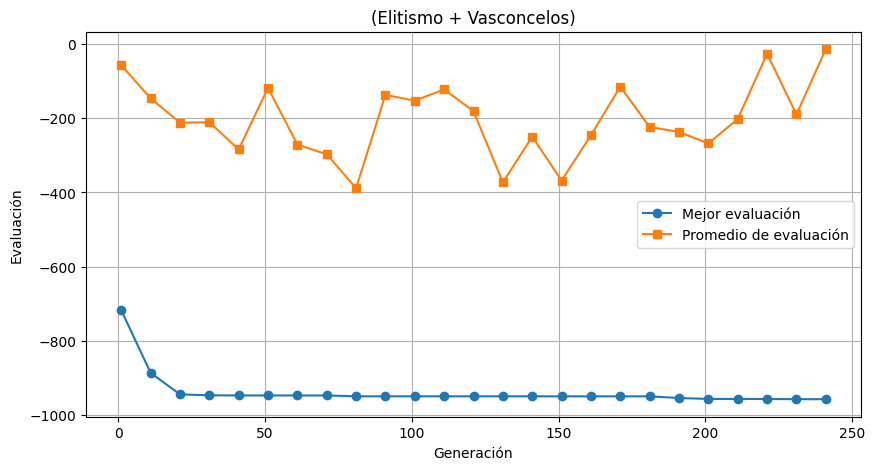

In [168]:
print("Iteración 1")
def main():
    mejor_ind, mejor_apt, total_generacion, h, h_pp = AG_etapas_vasconcelos(
        pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
        etapas, generaciones)
    
    print("\nResultado final:")
    print("Total de generaciones:", total_generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,...,xn):", round(mejor_apt, decimales))
    
    
    gen_indices = np.arange(1, len(h)+1)
    gen_indices_thinned = gen_indices[::10]
    h_thinned = np.array(h)[::10]
    h_pp_thinned = np.array(h_pp)[::10]
    
    plt.figure(figsize=(10, 5))
    plt.plot(gen_indices_thinned, h_thinned, marker='o', linestyle='-', label="Mejor evaluación")
    plt.plot(gen_indices_thinned, h_pp_thinned, marker='s', linestyle='-', label="Promedio de evaluación")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title("(Elitismo + Vasconcelos)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
if __name__ == "__main__":
    main()
    print("Iteración 2")
if __name__ == "__main__":
    main()
    print("Iteración 3")
if __name__ == "__main__":
    main()
    print("Iteración 4")
if __name__ == "__main__":
    main()
    print("Iteración 5")
if __name__ == "__main__":
    main()            